In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
import pickle
from wordcloud import WordCloud
from ast import literal_eval

In [2]:
credits = pd.read_csv('/content/tmdb_5000_credits.csv')
movies_df = pd.read_csv('/content/tmdb_5000_movies.csv')

In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
print("Credits columns",credits.columns)
print("Movies columns",movies_df.columns)

Credits columns Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')
Movies columns Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [6]:
print("Credits shape",credits.shape)
print("Movies shape",movies_df.shape)

Credits shape (4803, 4)
Movies shape (4803, 20)


In [7]:
credits_column_renamed=credits.rename(index=str,columns={"movie_id":"id"})
movies=movies_df.merge(credits_column_renamed,on="id")

In [8]:
movies.shape

(4803, 23)

In [9]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [11]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [12]:
movies['crew']=movies['crew'].apply(json.loads)
def director(x):
   for i in x:
      if i['job'] == 'Director':
         return i['name']
movies['crew'] = movies['crew'].apply(director)
movies.rename(columns={'crew':'director'},inplace=True)

In [13]:
from ast import literal_eval
features = ['keywords','genres']
for feature in features:
  movies[feature] = movies[feature].apply(literal_eval)

In [14]:
def get_list(x):
  if isinstance(x, list):
    names = [i['name'] for i in x]
    if len(names) > 1:
      names = names[:1]
    return names
  return []

In [15]:
features = ['keywords', 'genres']
for feature in features:
  movies[feature] = movies[feature].apply(get_list)

In [16]:
movies['genres']

,genres
0,[Action]
1,[Adventure]
2,[Action]
3,[Action]
4,[Action]
...,...
4798,[Action]
4799,[Comedy]
4800,[Comedy]
4801,[]


In [17]:
movies['genres'] = movies['genres'] .str.join(', ')

In [18]:
movies['genres'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4803 entries, 0 to 4802
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
4803 non-null   object
dtypes: object(1)
memory usage: 37.6+ KB


In [19]:
movies['genres']

,genres
0,Action
1,Adventure
2,Action
3,Action
4,Action
...,...
4798,Action
4799,Comedy
4800,Comedy
4801,


In [20]:
movies['keywords'] = movies['keywords'].str.join(', ')

In [21]:
movies['keywords']

,keywords
0,culture clash
1,ocean
2,spy
3,dc comics
4,based on novel
...,...
4798,united states–mexico barrier
4799,
4800,date
4801,


In [22]:
movies.isnull().sum()

,0
budget,0
genres,0
homepage,3091
id,0
keywords,0
original_language,0
original_title,0
overview,3
popularity,0
production_companies,0


In [23]:
movies = movies.dropna(subset = ['director','runtime'])

In [24]:
movies["revenue"]=movies["revenue"].floordiv(1000000)
movies["budget"]=movies["budget"].floordiv(1000000)

<ipython-input-24-f91427788075>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["revenue"]=movies["revenue"].floordiv(1000000)
<ipython-input-24-f91427788075>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["budget"]=movies["budget"].floordiv(1000000)


In [25]:
movies = movies[movies['budget'] != 0]

In [26]:
# Ensure 'release_date' is already in datetime format without any data loss
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='raise')  # Raise errors if any data issues exist

# Extract the release month from the 'release_date' column
movies['release_month'] = movies['release_date'].dt.month

# Extract the day of the week (Monday=0, Sunday=6) from the 'release_date' column
movies['release_DOW'] = movies['release_date'].dt.dayofweek

# Preview the new columns
#print(movies[['release_date', 'release_month', 'release_DOW']].head())


<ipython-input-26-5d34ab2e5585>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['release_date'] = pd.to_datetime(movies['release_date'], errors='raise')  # Raise errors if any data issues exist
<ipython-input-26-5d34ab2e5585>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['release_month'] = movies['release_date'].dt.month
<ipython-input-26-5d34ab2e5585>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

Text(0.5, 1.0, 'Boxplot of Runtime')

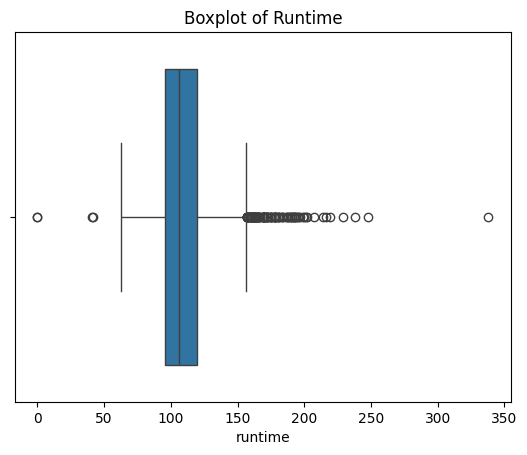

In [27]:
sns.boxplot(x=movies['runtime'])
plt.title('Boxplot of Runtime')

Text(0.5, 1.0, 'Boxplot of Revenue')

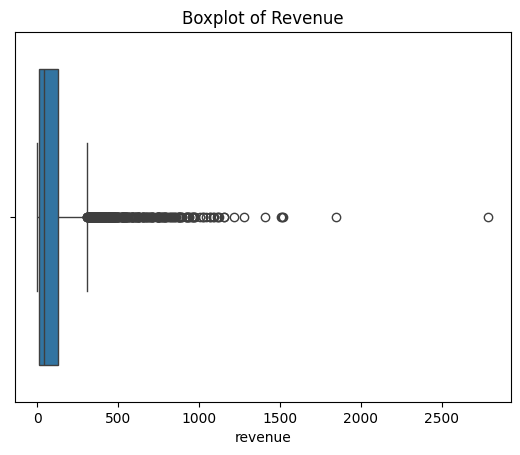

In [28]:
sns.boxplot(x=movies['revenue'])
plt.title('Boxplot of Revenue')

Text(0.5, 1.0, 'Boxplot of Budget')

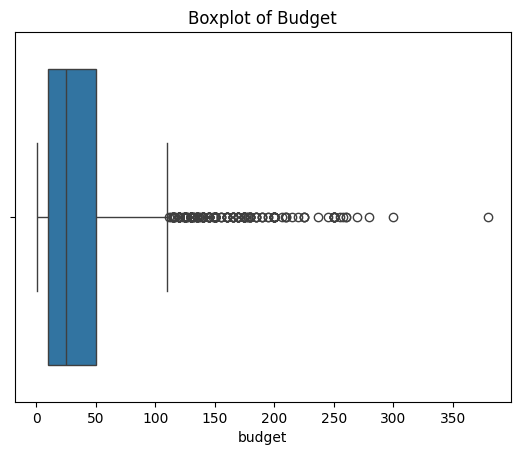

In [29]:
sns.boxplot(x=movies['budget'])
plt.title('Boxplot of Budget')

In [30]:
movies['log_revenue'] = np.log1p(movies['revenue'])
movies['log_budget'] = np.log1p(movies['budget'])

<ipython-input-31-106bc36656f8>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


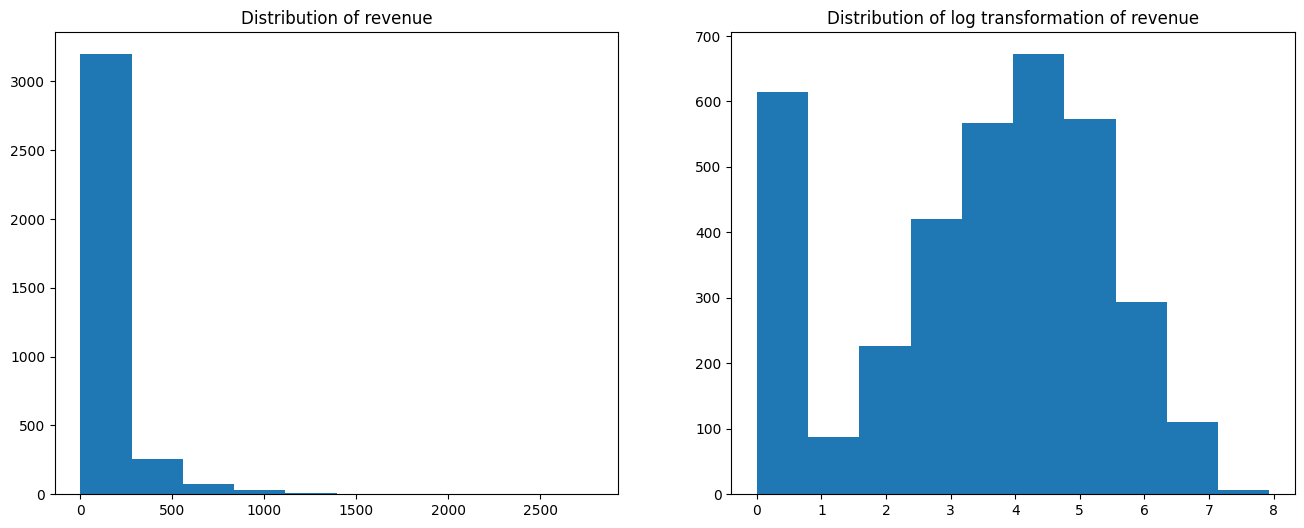

In [31]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(movies['revenue']);
plt.title('Distribution of revenue');
plt.subplot(1, 2, 2)
plt.hist(movies['log_revenue']);
plt.title('Distribution of log transformation of revenue');

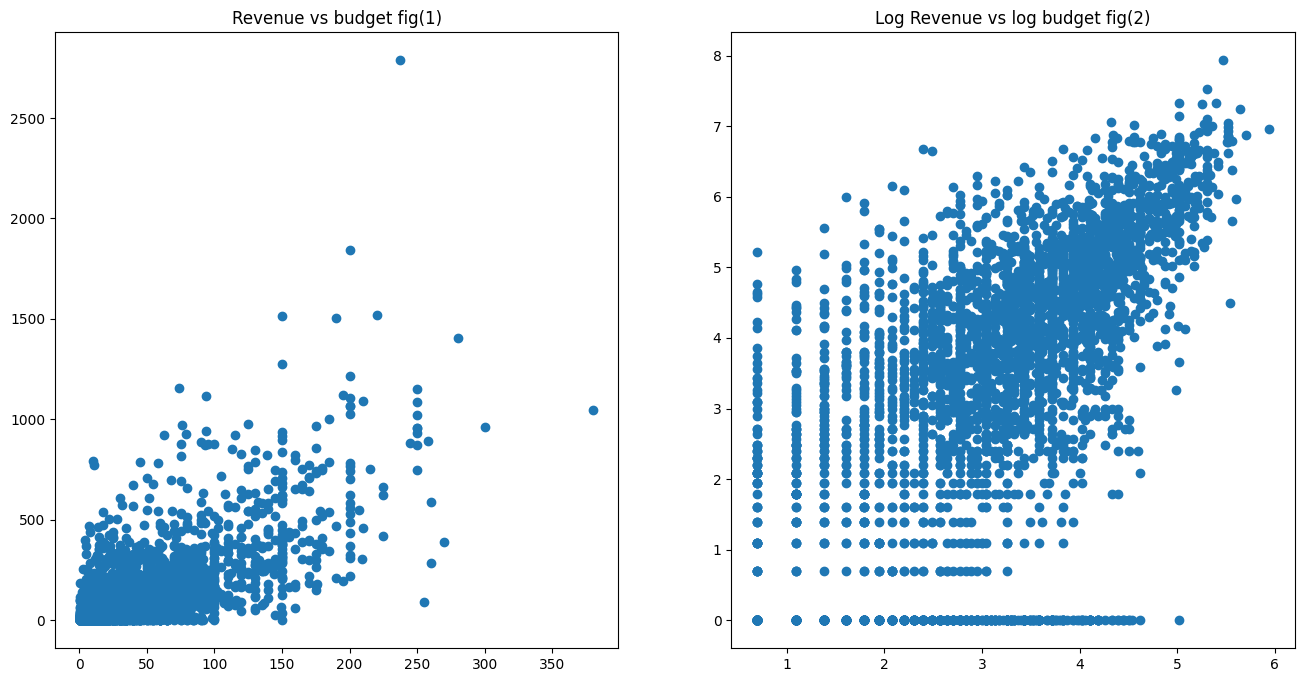

In [32]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(movies['budget'], movies['revenue'])
plt.title('Revenue vs budget fig(1)');
plt.subplot(1, 2, 2)
plt.scatter(movies['log_budget'], movies['log_revenue'])
plt.title('Log Revenue vs log budget fig(2)');

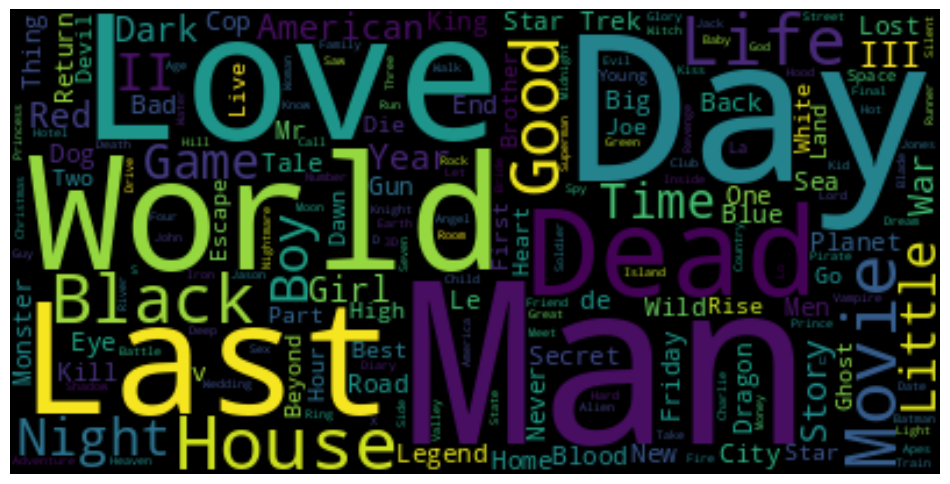

In [33]:
wordcloud = WordCloud().generate(movies.original_title.to_string())
sns.set(rc={'figure.figsize':(12,8)})
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

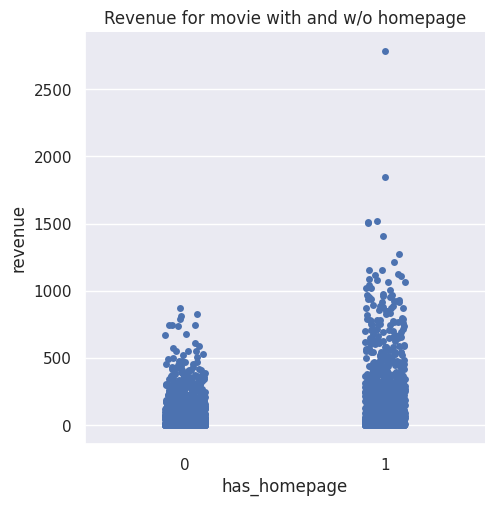

In [34]:
movies['has_homepage'] = 0
movies.loc[movies['homepage'].isnull() == False, 'has_homepage'] = 1
sns.catplot(x='has_homepage', y='revenue', data=movies);
plt.title('Revenue for movie with and w/o homepage');

Text(0.5, 1.0, 'Revenue by Release Month')

<Figure size 1500x800 with 0 Axes>

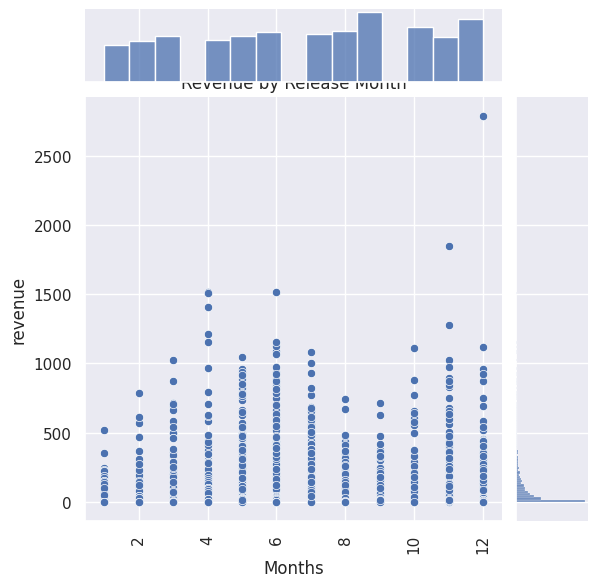

In [35]:
# Fixing the jointplot call by specifying x and y arguments
plt.figure(figsize=(15,8))
sns.jointplot(x='release_month', y='revenue', data=movies)
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.title('Revenue by Release Month')

In [36]:
movies['log_revenue'] = np.log1p(movies['revenue'])
movies['log_budget'] = np.log1p(movies['budget'])

In [37]:
movies_box = movies.drop(['homepage','id','keywords','original_language','original_title',
                          'overview','production_countries','release_date','spoken_languages',
                          'status','tagline','title_x','title_y','cast',
                          'log_revenue','log_budget'],axis = 1)

In [38]:
movies_box=movies_box.drop(['production_companies'],axis=1)

In [39]:
movies_box.isnull().sum()

,0
budget,0
genres,0
popularity,0
revenue,0
runtime,0
vote_average,0
vote_count,0
director,0
release_month,0
release_DOW,0


In [40]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as c
cat=['director','genres']
for i in movies_box[cat]:
  print("LABEL ENCODING OF:",i)
  LE = LabelEncoder()
  print(c(movies_box[i]))
  movies_box[i] = LE.fit_transform(movies_box[i])
  print(c(movies_box[i]))

LABEL ENCODING OF: director
Counter({'Steven Spielberg': 27, 'Clint Eastwood': 19, 'Ridley Scott': 16, 'Martin Scorsese': 16, 'Woody Allen': 16, 'Steven Soderbergh': 15, 'Renny Harlin': 15, 'Robert Rodriguez': 15, 'Tim Burton': 14, 'Oliver Stone': 14, 'Robert Zemeckis': 13, 'Michael Bay': 12, 'Ron Howard': 12, 'Joel Schumacher': 12, 'Tony Scott': 12, 'Brian De Palma': 12, 'Francis Ford Coppola': 12, 'Barry Levinson': 11, 'Bobby Farrelly': 11, 'David Fincher': 10, 'Shawn Levy': 10, 'Richard Donner': 10, 'Chris Columbus': 10, 'Paul W.S. Anderson': 10, 'Rob Reiner': 10, 'Joel Coen': 10, 'Wes Craven': 10, 'Kevin Smith': 10, 'Richard Linklater': 10, 'Sam Raimi': 9, 'Peter Jackson': 9, 'Rob Cohen': 9, 'M. Night Shyamalan': 9, 'John McTiernan': 9, 'Spike Lee': 9, 'John Carpenter': 9, 'Christopher Nolan': 8, 'Bryan Singer': 8, 'Brett Ratner': 8, 'Martin Campbell': 8, 'Roland Emmerich': 8, 'Quentin Tarantino': 8, 'Simon West': 8, 'Dennis Dugan': 8, 'Adam Shankman': 8, 'F. Gary Gray': 8, 'Antoin

In [41]:
mapping_dict ={}
category_col=["directory","director"]
for col in category_col:
  LE_name_mapping = dict(zip(LE.classes_,LE.transform(LE.classes_)))
  mapping_dict[col]= LE_name_mapping
  print(mapping_dict)

{'directory': {'Action': 0, 'Adventure': 1, 'Animation': 2, 'Comedy': 3, 'Crime': 4, 'Documentary': 5, 'Drama': 6, 'Family': 7, 'Fantasy': 8, 'History': 9, 'Horror': 10, 'Music': 11, 'Mystery': 12, 'Romance': 13, 'Science Fiction': 14, 'TV Movie': 15, 'Thriller': 16, 'War': 17, 'Western': 18}}
{'directory': {'Action': 0, 'Adventure': 1, 'Animation': 2, 'Comedy': 3, 'Crime': 4, 'Documentary': 5, 'Drama': 6, 'Family': 7, 'Fantasy': 8, 'History': 9, 'Horror': 10, 'Music': 11, 'Mystery': 12, 'Romance': 13, 'Science Fiction': 14, 'TV Movie': 15, 'Thriller': 16, 'War': 17, 'Western': 18}, 'director': {'Action': 0, 'Adventure': 1, 'Animation': 2, 'Comedy': 3, 'Crime': 4, 'Documentary': 5, 'Drama': 6, 'Family': 7, 'Fantasy': 8, 'History': 9, 'Horror': 10, 'Music': 11, 'Mystery': 12, 'Romance': 13, 'Science Fiction': 14, 'TV Movie': 15, 'Thriller': 16, 'War': 17, 'Western': 18}}


In [42]:
x=movies_box.iloc[:,[0,1,2,4,5,6,8,9]]
x=pd.DataFrame(x,columns=['budget','genres','popularity','runtime','vote_average','vote_count','release_month','release_DOW'])
x

,budget,genres,popularity,runtime,vote_average,vote_count,release_month,release_DOW
0,237,0,150.437577,162.0,7.2,11800,12,3
1,300,1,139.082615,169.0,6.9,4500,5,5
2,245,0,107.376788,148.0,6.3,4466,10,0
3,250,0,112.312950,165.0,7.6,9106,7,0
4,260,0,43.926995,132.0,6.1,2124,3,2
...,...,...,...,...,...,...,...,...
4586,35,3,38.100488,99.0,5.8,923,5,2
4596,6,10,19.331884,89.0,6.0,316,12,2
4682,13,10,4.009379,95.0,4.6,24,1,4
4720,8,6,9.452808,120.0,6.5,178,9,4


In [43]:
y=movies_box.iloc[:,[3]]
y=pd.DataFrame(y,columns=['revenue'])
y

,revenue
0,2787
1,961
2,880
3,1084
4,284
...,...
4586,170
4596,0
4682,0
4720,15


In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[ 4.6119201 , -1.10962   ,  3.53184628, ...,  7.96817027,
         1.48974933, -0.11265796],
       [ 6.07901328, -0.88369987,  3.20720932, ...,  2.6357689 ,
        -0.57429457,  1.39493336],
       [ 4.79821765, -1.10962   ,  2.30074366, ...,  2.61093306,
         0.9000225 , -2.37404493],
       ...,
       [-0.60441118,  1.14958124, -0.65451776, ..., -0.63379666,
        -1.75374823,  0.6411377 ],
       [-0.72084715,  0.24590074, -0.4988908 , ..., -0.5213049 ,
         0.60515909,  0.6411377 ],
       [-0.81399592,  2.50510198,  0.02172764, ..., -0.19040383,
        -1.1640214 ,  1.39493336]])

In [45]:
pickle.dump(sc,open("scalar_movies.pkl",'wb'))

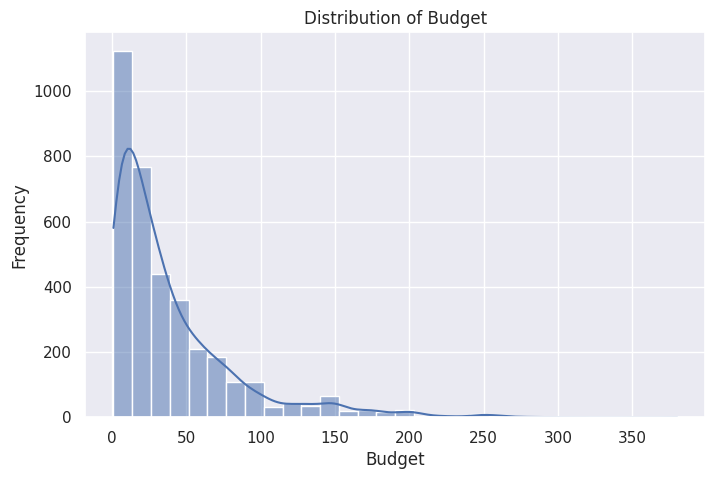

In [46]:
plt.figure(figsize=(8, 5))
sns.histplot(movies['budget'], bins=30, kde=True)
plt.title('Distribution of Budget')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

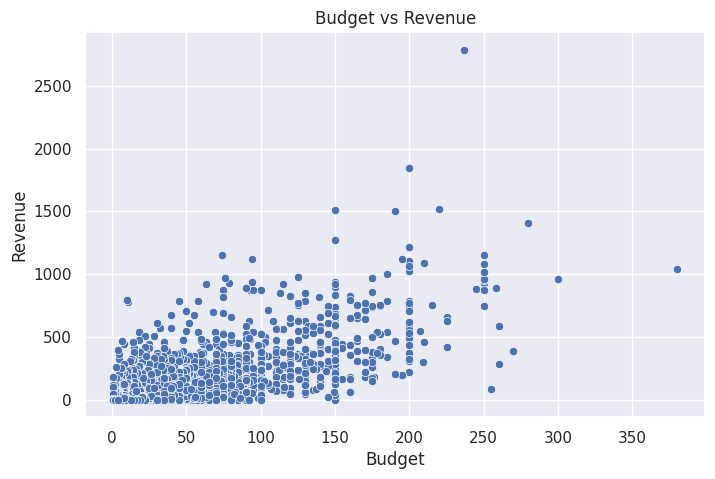

In [47]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='budget', y='revenue', data=movies)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

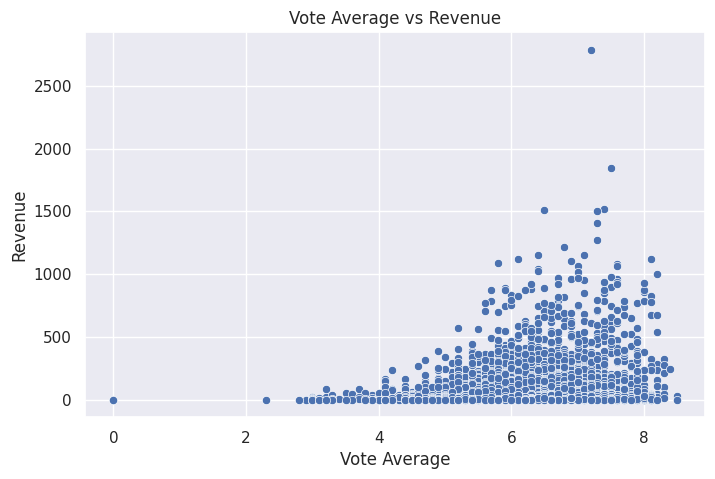

In [48]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='vote_average', y='revenue', data=movies)
plt.title('Vote Average vs Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Revenue')
plt.show()

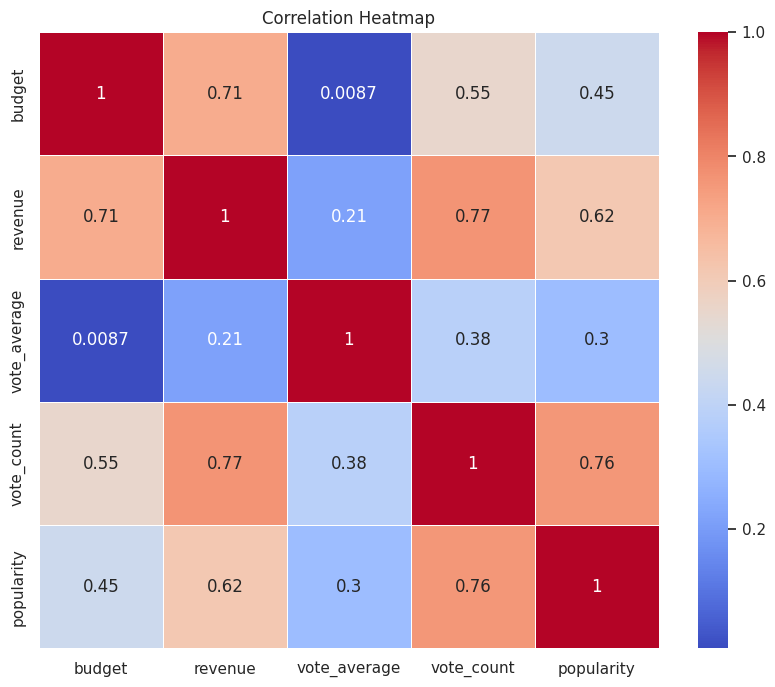

In [49]:
plt.figure(figsize=(10, 8))
corr_matrix = movies[['budget', 'revenue', 'vote_average', 'vote_count', 'popularity']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.1, random_state=11)

In [51]:
from sklearn.linear_model import LinearRegression
mr=LinearRegression()
mr.fit(x_train,y_train)

LinearRegression()

In [52]:
y_pred_mr=mr.predict(x_test)

In [53]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_pred_mr))
print("RMSE:",np.sqrt(metrics.mean_absolute_error(y_test,y_pred_mr)))

MAE: 54.37754333076527
RMSE: 7.37411305383673


In [54]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_mr)

0.7758003459046133

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def linear_regression(X_train, X_test, y_train, y_test):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print("**Linear Regression**")
    print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("R2 Score: ", r2_score(y_test, y_pred))


In [56]:
linear_regression(x_train, x_test, y_train, y_test)

**Linear Regression**
Mean Absolute Error:  54.37754333076527
Mean Squared Error:  8649.147282950133
R2 Score:  0.7758003459046133


In [57]:
from sklearn.tree import DecisionTreeRegressor

def decision_tree_regression(X_train, X_test, y_train, y_test):
    dt = DecisionTreeRegressor()
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    print("**Decision Tree Regression**")
    print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("R2 Score: ", r2_score(y_test, y_pred))

In [58]:
decision_tree_regression(x_train, x_test, y_train, y_test)

**Decision Tree Regression**
Mean Absolute Error:  72.27094972067039
Mean Squared Error:  17663.438547486032
R2 Score:  0.5421355790428016


In [59]:
from sklearn.svm import SVR

def svm_regression(X_train, X_test, y_train, y_test):
    svm = SVR()
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print("**Support Vector Machine Regression**")
    print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("R2 Score: ", r2_score(y_test, y_pred))

In [60]:
svm_regression(x_train, x_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Support Vector Machine Regression**
Mean Absolute Error:  77.86172947055108
Mean Squared Error:  32681.373101706347
R2 Score:  0.15284682928123028


In [61]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_regression(X_train, X_test, y_train, y_test):
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    print("**Random Forest Regression**")
    print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("R2 Score: ", r2_score(y_test, y_pred))

In [62]:
random_forest_regression(x_train, x_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


**Random Forest Regression**
Mean Absolute Error:  51.35743016759776
Mean Squared Error:  9335.685743575417
R2 Score:  0.7580041770616118


In [63]:
from sklearn.neighbors import KNeighborsRegressor

def knn_regression(X_train, X_test, y_train, y_test):
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("**K-Nearest Neighbors Regression**")
    print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("R2 Score: ", r2_score(y_test, y_pred))

In [64]:
knn_regression(x_train, x_test, y_train, y_test)

**K-Nearest Neighbors Regression**
Mean Absolute Error:  57.13631284916202
Mean Squared Error:  9456.183687150837
R2 Score:  0.7548806787114254


In [65]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

def ridge_regression_with_tuning(X_train, X_test, y_train, y_test):
    param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}  # Regularization strength

    ridge = Ridge()
    grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    best_ridge = grid_search.best_estimator_
    y_pred = best_ridge.predict(X_test)

    print("Best Ridge Hyperparameters:", grid_search.best_params_)
    print("R2 Score: ", r2_score(y_test, y_pred))
    print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

# Example usage:
ridge_regression_with_tuning(x_train, x_test, y_train, y_test)


Best Ridge Hyperparameters: {'alpha': 100}
R2 Score:  0.7767821907211369
Mean Absolute Error:  54.220345539504514
Mean Squared Error:  8611.26979174089


In [66]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

def svr_with_tuning(X_train, X_test, y_train, y_test):
    param_grid = {
        'C': [0.1, 1, 10, 100],            # Regularization parameter
        'epsilon': [0.001, 0.01, 0.1, 1],  # Epsilon-tube within which no penalty is associated
        'kernel': ['linear', 'rbf']         # Type of kernel
    }

    svr = SVR()
    grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    best_svr = grid_search.best_estimator_
    y_pred = best_svr.predict(X_test)

    print("Best SVR Hyperparameters:", grid_search.best_params_)
    print("R2 Score: ", r2_score(y_test, y_pred))
    print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

# Example usage:
svr_with_tuning(x_train, x_test, y_train, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best SVR Hyperparameters: {'C': 100, 'epsilon': 0.1, 'kernel': 'linear'}
R2 Score:  0.7367468556578113
Mean Absolute Error:  52.433519903226696
Mean Squared Error:  10155.748131291039


In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

def random_forest_regressor_with_tuning(X_train, X_test, y_train, y_test):
    param_grid = {
        'n_estimators': [100],      # Number of trees in the forest
        'max_depth': [20],      # Maximum depth of the tree
        'min_samples_split': [ 5],      # Minimum number of samples required to split a node
        'min_samples_leaf': [2],        # Minimum number of samples required at a leaf node
        'bootstrap': [True]            # Whether bootstrap samples are used when building trees
    }

    rf = RandomForestRegressor()
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    best_rf = grid_search.best_estimator_
    y_pred = best_rf.predict(X_test)

    print("Best Random Forest Hyperparameters:", grid_search.best_params_)
    print("R2 Score: ", r2_score(y_test, y_pred))
    print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

# Example usage:
random_forest_regressor_with_tuning(x_train, x_test, y_train, y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Best Random Forest Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
R2 Score:  0.7560750970469459
Mean Absolute Error:  50.496354846015414
Mean Squared Error:  9410.10556029977


In [68]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

def knn_regressor_with_tuning(X_train, X_test, y_train, y_test):
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],        # Number of neighbors
        'weights': ['uniform', 'distance'], # Weight function used in prediction
        'metric': ['euclidean', 'manhattan'] # Distance metric
    }

    knn = KNeighborsRegressor()
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    best_knn = grid_search.best_estimator_
    y_pred = best_knn.predict(X_test)

    print("Best KNN Hyperparameters:", grid_search.best_params_)
    print("R2 Score: ", r2_score(y_test, y_pred))
    print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

# Example usage:
knn_regressor_with_tuning(x_train, x_test, y_train, y_test)


Best KNN Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
R2 Score:  0.7630703174092871
Mean Absolute Error:  53.68478003216156
Mean Squared Error:  9140.244790733906


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def decision_tree_regressor_with_tuning(X_train, X_test, y_train, y_test):
    dt = DecisionTreeRegressor()
    param_grid = {
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='r2')
    grid_search.fit(X_train, y_train)

    best_dt = grid_search.best_estimator_
    y_pred = best_dt.predict(X_test)

    print("**Decision Tree Regressor**")
    print("Best Params: ", grid_search.best_params_)
    print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
    print("R2 Score: ", r2_score(y_test, y_pred))

# Usage:
decision_tree_regressor_with_tuning(x_train, x_test, y_train, y_test)


**Decision Tree Regressor**
Best Params:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Absolute Error:  55.310368452997785
Mean Squared Error:  10950.050909112899
R2 Score:  0.7161572643132731


In [70]:
import pickle
pickle.dump(mr,open("model_movies.pkl","wb"))

In [71]:
model=pickle.load(open("model_movies.pkl","rb"))
scalar=pickle.load(open("scalar_movies.pkl","rb"))

input=[[50,8,20.239061,88,5,366,7,3]]
input=scalar.transform(input)
prediction = model.predict(input)

prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[90.21511689]])